In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_2592\2195792076.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load datasets

In [4]:
# Syntethic dataset
X_train_syn = pd.read_csv("datasets/synthetic/syn_X_train.csv").values
y_train_syn = pd.read_csv("datasets/synthetic/syn_y_train.csv").values.reshape(-1)
X_test_syn = pd.read_csv("datasets/synthetic/syn_X_test.csv").values
y_test_syn = pd.read_csv("datasets/synthetic/syn_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_syn.shape}, y_train = {y_train_syn.shape}
X_test = {X_test_syn.shape}, y_test = {y_test_syn.shape}""")


Apple quality dataset
X_train = (4000, 11), y_train = (4000,)
X_test = (1000, 11), y_test = (1000,)


In [5]:
w0Syn = (2 + 2) * np.random.default_rng(42).random(11) - 2

In [7]:
benchSyn1 = LogisticRegression(C=1).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn3 = LogisticRegression(C=1, solver="CG").fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)

benchSyn_data = optim_bench([benchSyn1, benchSyn2, benchSyn3])

In [2]:
# Apple quality
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}, y_train = {y_train_apple.shape}
X_test = {X_test_apple.shape}, y_test = {y_test_apple.shape}""")


Apple quality dataset
X_train = (3200, 8), y_train = (3200,)
X_test = (800, 8), y_test = (800,)


In [3]:
w0Apple = (2 + 2) * np.random.default_rng(42).random(8) - 2

In [4]:
benchApple1 = LogisticRegression(C=1).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple3 = LogisticRegression(C=1, solver="CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)

benchApple_data = optim_bench([benchApple1, benchApple2, benchApple3])

In [2]:
# Cars purchaising
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

print(f"""
Cars purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Cars purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [3]:
w0Car = (2 + 2) * np.random.default_rng(42).random(4) - 2

In [4]:
benchCar1 = LogisticRegression(C=1).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar3 = LogisticRegression(C=1, solver="CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)

benchCar_data = optim_bench([benchCar1, benchCar2, benchCar3])

In [ ]:
# Loan eligibility
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")

In [ ]:
w0Loan = (1.5 + 1.5) * np.random.default_rng(42).random(12) - 1.5

In [ ]:
benchmarkLoan = LogisticRegression(C=1).fit(w0Loan, X_train_car, y_train_car, X_test_car, y_test_car)

In [ ]:
# HR score
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")

In [ ]:
w0HR = (2 + 2) * np.random.default_rng(42).random(10) - 2

In [ ]:
benchmarkHR = LogisticRegression(C=1).fit(w0HR, X_train_car, y_train_car, X_test_car, y_test_car)

In [ ]:
# Bank churn
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")

In [ ]:
w0Bank = (1.5 + 1.5) * np.random.default_rng(42).random(18) - 1.5

In [ ]:
benchmarkBank = LogisticRegression(C=1).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)

In [2]:
# Breast cancer
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}, y_train = {y_train_breast.shape}
X_test = {X_test_breast.shape}, y_test = {y_test_breast.shape}""")


Breast cancer dataset
X_train = (455, 31), y_train = (455,)
X_test = (114, 31), y_test = (114,)


In [3]:
w0Breast = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

In [14]:
benchBreast1 = LogisticRegression(C=1).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast3 = LogisticRegression(C=1, solver="CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)

benchBreast_data = optim_bench([benchBreast1, benchBreast2, benchBreast3])

# Synthetic dataset

In [19]:
sgdSyn_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.01)

In [ ]:
sgdSyn_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

In [ ]:
sgdmSyn1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
sgdmSyn2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [11]:
sgdSyn_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

mslcSyn1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslcSyn2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

mslrSyn1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslrSyn2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [20]:
modelsSyn_data = optim_data([sgdSyn_fixed1, sgdSyn_fixed2, sgdSyn_decre1, sgdSyn_decre2, sgdmSyn1, sgdmSyn2,
                             sgdSyn_armijo1, sgdSyn_armijo2, mslcSyn1, mslcSyn2, mslrSyn1, mslrSyn2])

In [21]:
models_summary(modelsSyn_data, benchSyn_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,1339.457982,0.079935,NaN,15,0.86225,0.882,0.000000
1,Newton-CG,1,NaN,NaN,NaN,1339.457931,0.005946,NaN,11,0.86225,0.882,0.009562
2,CG,1,NaN,NaN,NaN,1339.457931,0.000010,NaN,30,0.86225,0.882,0.009369
3,SGD-Fixed,1,32.0,0.50,0.0,2135.844154,1457.445297,0.577262,200,0.84425,0.852,1.617901
4,SGD-Fixed,1,32.0,0.01,0.0,2125.507396,1434.779432,0.525191,200,0.86225,0.881,1.612940
5,SGD-Decreasing,1,32.0,1.00,0.0,2122.357089,1430.122991,0.556323,200,0.86125,0.883,1.610723
6,SGD-Decreasing,1,32.0,0.10,0.0,2121.326489,1428.592248,0.606449,200,0.86075,0.883,1.609980
7,SGDM,1,32.0,1.00,0.9,2127.668750,1438.911020,0.555465,200,0.85875,0.876,1.614198
8,SGDM,1,32.0,0.10,0.9,2120.918882,1427.987118,0.534476,200,0.86125,0.882,1.609727
9,SGD-Armijo,1,32.0,1.00,0.0,1999.725487,1253.762850,11.599034,200,0.84675,0.856,1.516284


C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["labels"] = df1["Solver"] + "(" + df1["Step-size"].astype(str) + ")"
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["labels"] = df2["Solver"] + "(" + df2["Step-size"].astype(str) + ")"


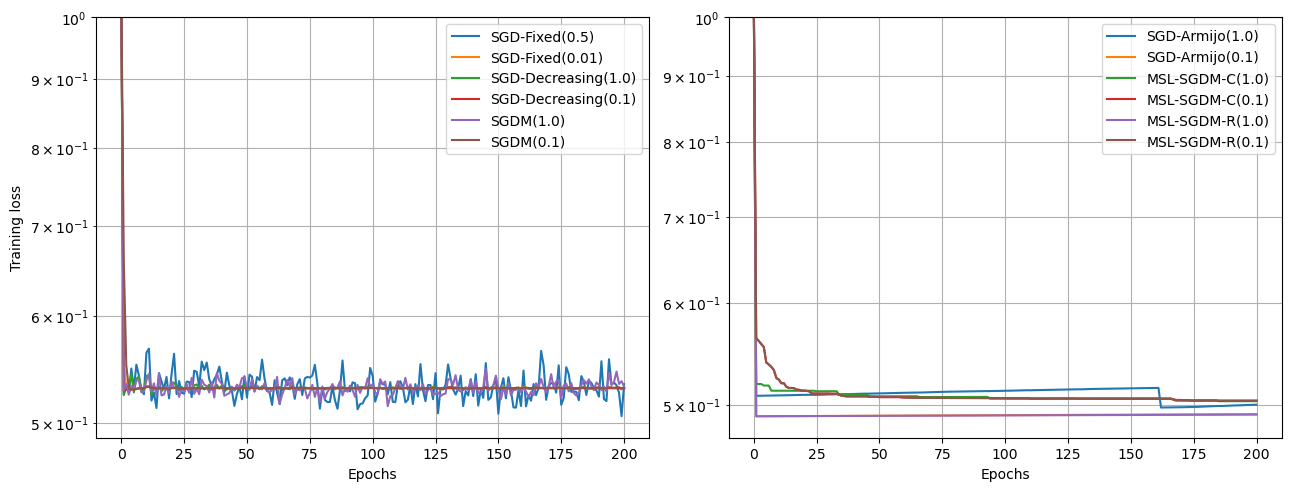

In [22]:
diagnostic(modelsSyn_data)

# Apple quality dataset

In [17]:
# SGD-Fixed
sgdApple_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
#sgdApple_fixed3 = LogisticRegression(solver="SGD-Fixed", C=0.1, minibatch=16).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.001)

In [6]:
# SGD-Decreasing
sgdApple_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
#sgdApple_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)

In [7]:
# SGD-Armijo
sgdApple_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
#sgdApple_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=64).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)

In [14]:
# SGDM
sgdmApple1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
sgdmApple2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
#sgdmApple_3 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.5, momentum=0.9)

In [9]:
# MSL-SGDM-C
mslcApple1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslcApple2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
#mslcApple_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.0001, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrApple1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslrApple2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
#mslrApple_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.0001, momentum=0.9)

In [15]:
modelsApple_data = optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_decre1, sgdApple_decre2, sgdmApple1, sgdmApple2,
                               sgdApple_armijo1, sgdApple_armijo2, mslcApple1, mslcApple2, mslrApple1, mslrApple2])
#modelsApple_data[["Solver", "Step-size", "Loss"]].sort_values(by="Loss")

## Summary

In [12]:
models_summary(modelsApple_data, benchApple_data)#.sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,1644.496774,0.712087,NaN,8,0.745313,0.75375,0.000000
1,Newton-CG,1,NaN,NaN,NaN,1644.496101,0.003009,NaN,11,0.745313,0.75375,0.002482
2,CG,1,NaN,NaN,NaN,1644.496101,0.000010,NaN,17,0.745313,0.75375,0.002482
3,SGD-Fixed,1,32.0,0.10,0.0,2081.557203,649.655602,0.405343,200,0.697812,0.71375,1.901900
4,SGD-Fixed,1,32.0,0.01,0.0,2075.541738,641.041753,0.473080,200,0.713125,0.73875,1.892689
5,SGD-Decreasing,1,32.0,1.00,0.0,2074.553123,639.788899,0.388835,200,0.712812,0.73750,1.891093
6,SGD-Decreasing,1,32.0,0.10,0.0,2074.319146,639.555147,0.382757,200,0.713125,0.74000,1.890674
7,SGDM,1,32.0,0.10,0.9,2074.693845,639.906931,0.482541,200,0.713750,0.73750,1.891865
8,SGDM,1,32.0,0.01,0.9,2074.256081,639.396045,0.539250,200,0.712812,0.74000,1.890769
9,SGD-Armijo,1,32.0,1.00,0.0,1978.264037,566.325246,8.000612,200,0.706250,0.71875,1.688026


C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["labels"] = df1["Solver"] + "(" + df1["Step-size"].astype(str) + ")"
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["labels"] = df2["Solver"] + "(" + df2["Step-size"].astype(str) + ")"


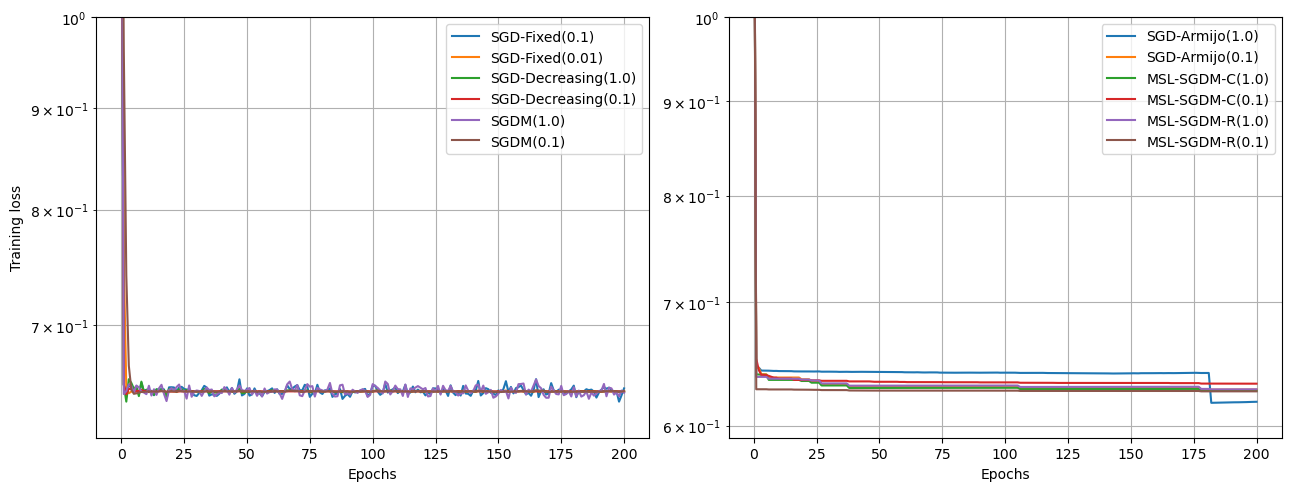

In [18]:
diagnostic(modelsApple_data)

# Cars purchaising dataset

In [5]:
# SGD-Fixed
sgdCar_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
#sgdCar_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdCar_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
#sgdCar_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [7]:
# SGD-Armijo
sgdCar_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
#sgdCar_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [8]:
# SGDM
sgdmCar_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
#sgdmCar_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [9]:
# MSL-SGDM-C
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
#mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
#mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [16]:
modelsCar_data = optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_decre1, sgdCar_decre2, sgdmCar_1, sgdmCar_2,
                             sgdCar_armijo1, sgdCar_armijo2, mslcCar_1, mslcCar_2, mslrCar_1, mslrCar_2])
#modelsCar_data[["Solver", "Loss"]].sort_values(by="Loss")

## Summary

In [17]:
models_summary(modelsCar_data, benchCar_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,283.168161,3.693139e-02,NaN,7,0.826260,0.830688,0.000000
1,Newton-CG,1,NaN,NaN,NaN,283.168154,3.391424e-04,NaN,7,0.826260,0.830688,0.000361
2,CG,1,NaN,NaN,NaN,283.168154,3.493771e-07,NaN,11,0.826260,0.830688,0.000361
3,SGD-Fixed,1,16.0,1.0,0.0,452.476597,2.152100e+02,0.129566,200,0.822281,0.814815,2.326625
4,SGD-Fixed,1,16.0,0.1,0.0,448.757240,2.122943e+02,0.149469,200,0.830239,0.825397,2.307692
5,SGD-Decreasing,1,16.0,1.0,0.0,452.464604,2.154181e+02,0.148816,200,0.827586,0.814815,2.327639
6,SGD-Decreasing,1,16.0,0.1,0.0,452.473927,2.154157e+02,0.150137,200,0.828912,0.814815,2.327775
7,SGDM,1,16.0,1.0,0.9,450.492194,2.140365e+02,0.131282,200,0.826260,0.814815,2.315075
8,SGDM,1,16.0,0.1,0.9,452.530206,2.154549e+02,0.140852,200,0.831565,0.814815,2.328008
9,SGD-Armijo,1,16.0,1.0,0.0,411.727850,1.768008e+02,1.210242,200,0.769231,0.761905,2.081023


C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["labels"] = df1["Solver"] + "(" + df1["Step-size"].astype(str) + ")"
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["labels"] = df2["Solver"] + "(" + df2["Step-size"].astype(str) + ")"


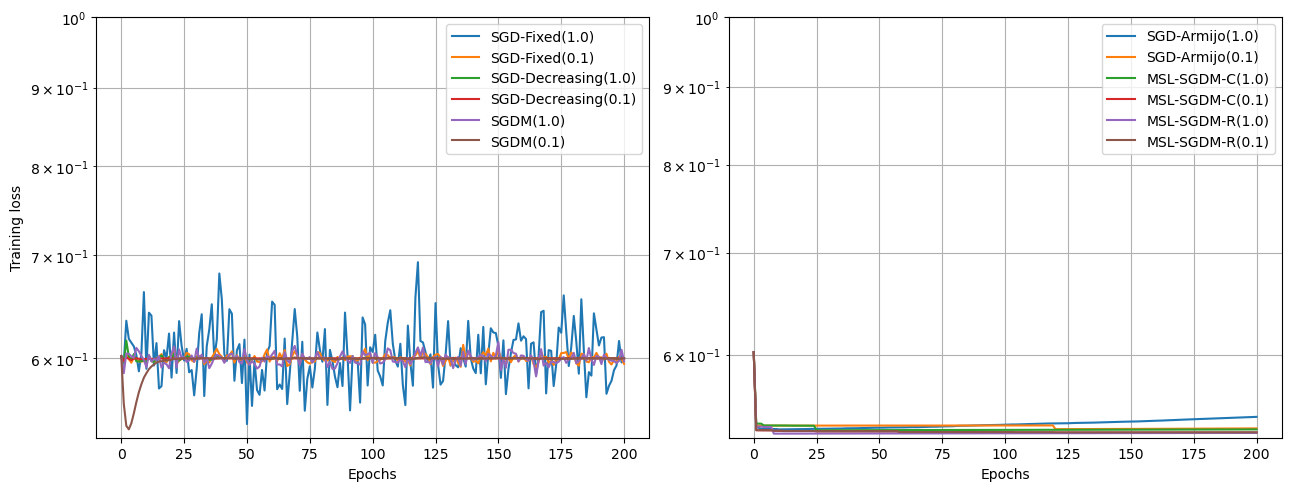

In [18]:
diagnostic(modelsCar_data)

# Loan eligibility dataset

In [ ]:
# SGD-Fixed
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [ ]:
# SGD-Decreasing
sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [ ]:
# SGD-Armijo
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

In [ ]:
# SGDM
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
sgdmLoan_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

In [ ]:
# MSL-SGDM-C
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [ ]:
# MSL-SGDM-R
mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [ ]:
modelsLoan_data1 = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_fixed3, sgdLoan_decre1, sgdLoan_decre2, sgdLoan_decre3])

In [ ]:
modelsLoan_data2 = optim_data([sgdLoan_armijo1, sgdLoan_armijo2, sgdLoan_armijo3])

In [ ]:
modelsLoan_data3 = optim_data([sgdmLoan_1, sgdmLoan_2, sgdmLoan_3])

In [ ]:
modelsLoan_data4 = optim_data([mslcLoan1, mslcLoan2, mslcLoan3, mslrLoan1, mslrLoan2, mslrLoan3])

## Summary

In [27]:
pd.concat([optim_bench(benchmarkLoan).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsLoan_data1, modelsLoan_data2, modelsLoan_data3, modelsLoan_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.986794,0.325904,0.203844,200,0.625000,0.687500
1,SGD-Fixed,16,0.10,0.0,0.984274,0.317291,0.186637,200,0.682292,0.708333
2,SGD-Fixed,16,0.05,0.0,0.984186,0.316995,0.204159,200,0.682292,0.708333
3,SGD-Decreasing,16,1.00,0.0,0.984125,0.316790,0.183476,200,0.682292,0.708333
4,SGD-Decreasing,16,0.10,0.0,0.984125,0.316791,0.184208,200,0.682292,0.708333
5,SGD-Decreasing,16,0.05,0.0,0.983771,0.315633,0.200348,200,0.684896,0.708333
0,SGD-Armijo,16,1.00,0.0,0.984005,0.316392,0.795221,200,0.682292,0.708333
1,SGD-Armijo,16,0.10,0.0,0.983981,0.316315,0.755242,200,0.682292,0.708333
2,SGD-Armijo,16,0.01,0.0,0.983947,0.316201,0.696185,200,0.682292,0.708333
0,SGDM,16,1.00,0.9,0.984179,0.317057,0.226201,200,0.682292,0.708333


# HR score dataset

In [ ]:
# SGD-Fixed
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [ ]:
# SGD-Decreasing
sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [ ]:
# SGD-Armijo
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [ ]:
# SGDM
sgdmHR1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
sgdmHR3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [ ]:
# MSL-SGDM-C
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [ ]:
# MSL-SGDM-R
mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [ ]:
modelsHR_data1 = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_fixed3, sgdHR_decre1, sgdHR_decre2, sgdHR_decre3])

In [ ]:
modelsHR_data2 = optim_data([sgdHR_armijo1, sgdHR_armijo2, sgdHR_armijo3])

In [ ]:
modelsHR_data3 = optim_data([sgdmHR1, sgdmHR2, sgdmHR3])

In [ ]:
modelsHR_data4 = optim_data([mslcHR1, mslcHR2, mslcHR3, mslrHR1, mslrHR2, mslrHR3])

## Summary

In [16]:
pd.concat([optim_bench(benchmarkHR).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([modelsHR_data1, modelsHR_data2, modelsHR_data3, modelsHR_data4]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

,Solver,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy
0,SGD-Fixed,16,1.00,0.0,0.825399,0.318026,0.127771,200,0.462500,0.316667
1,SGD-Fixed,16,0.10,0.0,0.825121,0.316516,0.140579,200,0.462500,0.333333
2,SGD-Fixed,16,0.01,0.0,0.819480,0.305799,0.115701,200,0.470833,0.316667
3,SGD-Decreasing,16,1.00,0.0,0.825272,0.316845,0.124959,200,0.462500,0.333333
4,SGD-Decreasing,16,0.10,0.0,1.060016,0.348094,0.133337,200,0.475000,0.366667
5,SGD-Decreasing,16,0.01,0.0,3.238566,0.735635,0.126931,200,0.462500,0.366667
0,SGD-Armijo,16,1.00,0.0,0.963653,0.466465,0.569457,200,0.458333,0.316667
1,SGD-Armijo,16,0.10,0.0,0.963683,0.466530,0.533494,200,0.458333,0.316667
2,SGD-Armijo,16,0.01,0.0,0.963519,0.466007,0.497300,200,0.458333,0.316667
0,SGDM,16,1.00,0.9,0.968139,0.481250,0.148799,200,0.458333,0.316667


# Bank churn dataset

In [ ]:
# SGD-Fixed
sgdBank_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
sgdBank_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=256).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05)

In [ ]:
# SGD-Decreasing
sgdBank_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=512).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)

In [ ]:
# SGD-Armijo
sgdBank_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.01)
sgdBank_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.001)

In [ ]:
modelsBank_data1 = optim_data([])

In [ ]:
modelsBank_data2 = optim_data([])

In [ ]:
modelsBank_data3 = optim_data([])

## Summary

In [ ]:
pd.concat([optim_bench(benchmarkBank).drop(columns={"Solution", "Loss/Epochs"}),
          pd.concat([]).drop(columns={"Solution", "Loss/Epochs", "labels"})])

# Breast cancer dataset

In [5]:
# SGD-Fixed
sgdBreast_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
#sgdBreast_fixed3 = LogisticRegression(solver="SGD-Fixed", C=0.01, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdBreast_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
#sgdBreast_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.001)

In [7]:
# SGD-Armijo
sgdBreast_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
#sgdBreast_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [8]:
# SGDM
sgdmBreast_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
sgdmBreast_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
#sgdmBreast_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [9]:
# MSL-SGDM-C
mslcBreast_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
#mslcBreast_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrBreast_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
#mslrBreast_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [11]:
modelsBreast_data = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_decre1, sgdBreast_decre2, sgdmBreast_1, sgdmBreast_2,
                                sgdBreast_armijo1, sgdBreast_armijo2, mslcBreast_1, mslcBreast_2, mslrBreast_1, mslrBreast_2])

## Summary

In [15]:
models_summary(modelsBreast_data, benchBreast_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,206.613346,0.066685,NaN,12,0.362637,0.412281,0.000000
1,Newton-CG,1,NaN,NaN,NaN,206.612102,0.001591,NaN,84,0.362637,0.412281,0.043543
2,CG,1,NaN,NaN,NaN,206.612101,0.000019,NaN,29,0.362637,0.412281,0.043966
3,SGD-Fixed,1,16.0,1.0,0.0,236.550904,51.009914,0.090954,200,0.331868,0.377193,2.309363
4,SGD-Fixed,1,16.0,0.1,0.0,257.746997,133.376380,0.093749,200,0.353846,0.403509,2.399727
5,SGD-Decreasing,1,16.0,1.0,0.0,256.000909,126.977465,0.094246,200,0.353846,0.403509,2.393119
6,SGD-Decreasing,1,16.0,0.1,0.0,255.948368,126.768624,0.078115,200,0.353846,0.403509,2.393020
7,SGDM,1,16.0,1.0,0.9,258.998525,137.433680,0.095087,200,0.351648,0.403509,2.405013
8,SGDM,1,16.0,0.1,0.9,256.196994,127.588188,0.093250,200,0.353846,0.403509,2.394087
9,SGD-Armijo,1,16.0,1.0,0.0,248.767734,104.719958,0.820944,200,0.345055,0.394737,2.325881


C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["labels"] = df1["Solver"] + "(" + df1["Step-size"].astype(str) + ")"
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\ml_utils.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["labels"] = df2["Solver"] + "(" + df2["Step-size"].astype(str) + ")"


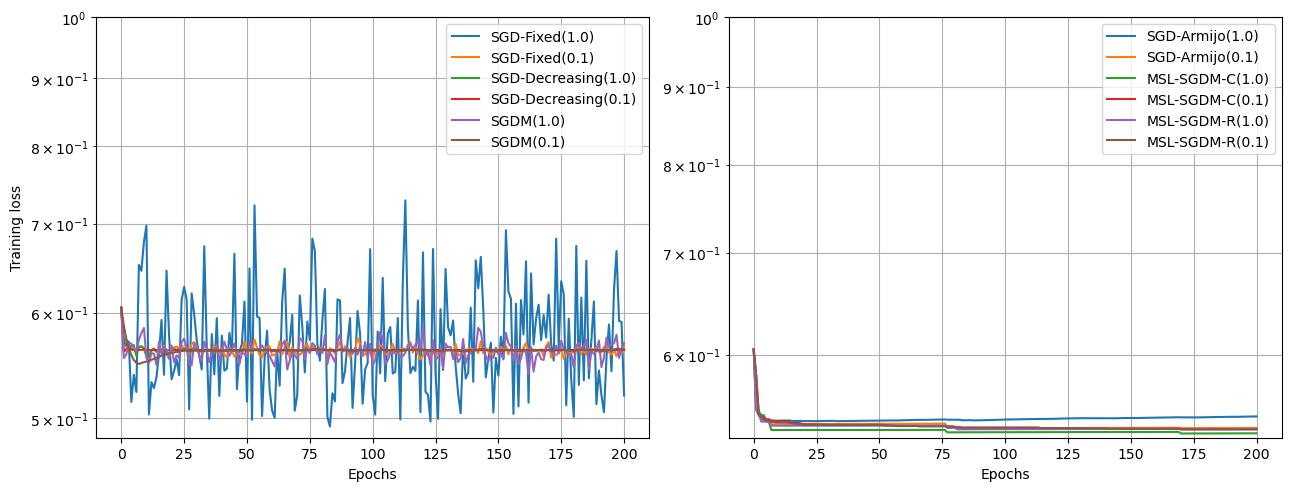

In [16]:
diagnostic(modelsBreast_data)